<a href="https://colab.research.google.com/github/NavyaPadamuttam/Loan/blob/main/dlp_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Embedding

from tensorflow.keras.layers import TextVectorization

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import tensorflow as tf  # Import TensorFlow before using it
import pandas as pd



df=pd.read_csv("/content/drive/MyDrive/fake_job_postings.csv")

df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [6]:
#drop jobs_id column and update 'work_remote' to 'work_remote's
df.drop(columns=['job_id'], inplace=True)
df.columns

Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

Exploring the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15184 non-null  object
 7   benefits             10668 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [8]:
df.nunique() #get # of unique values in dataset

,0
title,11231
location,3105
department,1337
salary_range,874
company_profile,1709
description,14801
requirements,11967
benefits,6204
telecommuting,2
has_company_logo,2


In [9]:
df.isna().sum()


,0
title,0
location,346
department,11547
salary_range,15012
company_profile,3308
description,1
requirements,2696
benefits,7212
telecommuting,0
has_company_logo,0


In [10]:
df['fraudulent'].value_counts()
#data is very imbalanced

,count
fraudulent,
0,17014
1,866


In [ ]:
#separate columns based on their type
text_cols = ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits']
categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
numeric_cols = ['work_remote', 'has_company_logo', 'has_questions', 'salary_low', 'salary_high']
col_to_predict = ['fraudulent']


Cleaning Dataset

Text Data

In [11]:
def move_column(df, col):
  df['Temp_Col'] = df[col]
  df.drop(columns=[col], inplace=True)
  df.rename(columns={'Temp_Col': col}, inplace=True)
  return df

In [12]:
df['employment_type'].fillna('No Data', inplace=True)
df['required_experience'].fillna('No Data', inplace=True)
df['required_education'].fillna('No Data', inplace=True)
df['industry'].fillna('No Data', inplace=True)
df['function'].fillna('No Data', inplace=True)

<ipython-input-12-eaa632796b54>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['employment_type'].fillna('No Data', inplace=True)
<ipython-input-12-eaa632796b54>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [29]:
df.isna().sum()

,0
title,0
location,0
department,0
salary_range,15012
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0


In [30]:
df.notna().sum()

,0
title,17880
location,17880
department,17880
salary_range,2868
company_profile,17880
description,17880
requirements,17880
benefits,17880
telecommuting,17880
has_company_logo,17880


In [31]:
# Look at the one row that has a missing description
df[df['description'].isna()]


,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,full_text


In [32]:
# Find rows where all text fields (except title & description) are empty
null_text = df[
    (df['location'].isna()) &
    (df['department'].isna()) &
    (df['company_profile'].isna()) &
    (df['requirements'].isna()) &
    (df['benefits'].isna())
]

print(f"There are {null_text.shape[0]} rows where all text columns aside from 'title' and 'description' are empty. Of these rows, {null_text['fraudulent'].sum()} are fraudulent posts.")


There are 0 rows where all text columns aside from 'title' and 'description' are empty. Of these rows, 0 are fraudulent posts.


In [33]:
# Replace NaN in text columns with empty strings
for col in text_cols:
    df[col].fillna(value=" ", inplace=True)
    print(f"Max length of '{col}': {df[col].map(len).max()}")  # Check max character length for each column


Max length of 'title': 142
Max length of 'location': 162
Max length of 'department': 255
Max length of 'company_profile': 6184
Max length of 'description': 14907
Max length of 'requirements': 10868
Max length of 'benefits': 4454


<ipython-input-33-1d2126bf0ac7>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(value=" ", inplace=True)


In [34]:
df['full_text'] = (
    df['title'] + " " +
    df['location'] + " " +
    df['department'] + " " +
    df['company_profile'] + " " +
    df['description'] + " " +
    df['requirements'] + " " +
    df['benefits']
)

# Show the first full_text entry
df['full_text'][0]


"Marketing Intern USA, NY, New York Marketing We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, Tech Crunch, and on the Today Show.We're located in Chelsea, in New York City. Food52, a fast-growing, James Beard Award-winning online food commu

In [35]:
print(f"Min length of 'full text': {df['full_text'].map(len).min()}")
print(f"Max length of 'full text': {df['full_text'].map(len).max()}")

Min length of 'full text': 43
Max length of 'full text': 14973


In [36]:
def update_text(new_df):
    new_df['full_text'] = new_df['full_text'].str.replace(pat='US', repl='USA', case=True)
    new_df['location'] = new_df['location'].str.replace(pat='US', repl='USA', case=True)
    return new_df


In [37]:
# update US with USA so it does not get mixed up with the word 'us'
df = update_text(df)

# Remove URLs, phone numbers, and emails — can help detect fake job posts

df['full_text'] = df['full_text']\
     .replace(r'http\S+', '', regex=True)\
     .replace(r'www\S+', '', regex=True)\
     .replace(r'#PHONE\S+', '', regex=True)\
     .replace(r'#EMAIL\S+', '', regex=True)


In [38]:
#separate 2 separate words that have been put together (i.e. PinterestLoves -> Pinterest Loves)
def space_words(all_text):
  import re
  # print('start', all_text)
  result = re.sub('(?<=[A-Za-z])(?=[A-Z][a-z])', '~', all_text)
  result = re.split('~', result)
  result = ' '.join(result)
  all_text = result
  # print('end',all_text)
  return all_text


In [39]:
texts = ['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'full_text']

for col in texts:
  df[col] = df[col].apply(space_words)

In [40]:
df.head(5)

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,full_text
0,Marketing Intern,"USAA, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,nan,0,1,0,Other,Internship,No Data,No Data,Marketing,0,"Marketing Intern USAA, NY, New York Marketing ..."
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from us Through being part o...,0,1,0,Full-time,Not Applicable,No Data,Marketing and Advertising,Customer Service,0,"Customer Service - Cloud Video Production NZ, ..."
2,Commissioning Machinery Assistant (CMA),"USAA, IA, Wever",nan,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,nan,0,1,0,No Data,No Data,No Data,No Data,No Data,0,"Commissioning Machinery Assistant (CMA) USAA, ..."
3,Account Executive - Washington DC,"USAA, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,"Account Executive - Washington DC USAA, DC, Wa..."
4,Bill Review Manager,"USAA, FL, Fort Worth",nan,NaN,Spot Source Solutions LLC is a Global Human Ca...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,"Bill Review Manager USAA, FL, Fort Worth nan S..."


In [41]:
def get_unique_words(new_df, col):
  unique_words = []
  idx = list(new_df.index.values)
  for i in idx:
    x = list(new_df[col][i].split())
    unique_words += x
  return unique_words

In [42]:
for col in texts:
  print(f'Number of total words in {col}: {len(get_unique_words(df, col))}')
  print(f'Number of unique words in {col}: {len(set(get_unique_words(df, col)))}\n')

Number of total words in title: 67673
Number of unique words in title: 7819

Number of total words in location: 56094
Number of unique words in location: 2714

Number of total words in department: 20430
Number of unique words in department: 1219

Number of total words in company_profile: 1672099
Number of unique words in company_profile: 28264

Number of total words in description: 3110059
Number of unique words in description: 127257

Number of total words in requirements: 1460011
Number of unique words in requirements: 85516

Number of total words in benefits: 561154
Number of unique words in benefits: 27945

Number of total words in employment_type: 21351
Number of unique words in employment_type: 7

Number of total words in required_experience: 32552
Number of unique words in required_experience: 11

Number of total words in required_education: 38486
Number of unique words in required_education: 22

Number of total words in industry: 39744
Number of unique words in industry: 193

N

In [43]:
salary_df = df['salary_range'].str.split(pat='-', n=-1, expand=True) #separate salary range into two columns
salary_df[0].unique()[90:100] #months (strings) are included as salaries due to csv interpretation of the salary range


array(['96000', '1050', '400000', 'Oct', '800000', '335000', '960000',
       '55', '480000', '24900'], dtype=object)

In [44]:
#convert the months in the salary columns into integers
months_to_int = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}


for i in range(salary_df[0].shape[0]):
  if salary_df[0][i] in months_to_int.keys():
    salary_df[0][i] = months_to_int[salary_df[0][i]]

for i in range(salary_df[1].shape[0]):
  if salary_df[1][i] in months_to_int.keys():
    salary_df[1][i] = months_to_int[salary_df[1][i]]

<ipython-input-44-3b204c4dfe90>:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  salary_df[0][i] = months_to_int[salary_df[0][i]]
<ipython-input-44-3b204c4dfe90>:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!

In [45]:
#verify conversion of string months to integers
salary_df[0].unique()[90:100]

array(['96000', '1050', '400000', 10, '800000', '335000', '960000', '55',
       '480000', '24900'], dtype=object)

In [46]:
salary_df.fillna(value=-1, inplace=True)
salary_df[0] = np.array(salary_df[0], dtype='int64')
salary_df[1] = np.array(salary_df[1], dtype='int64')

#move the min/max salary columns to the main dataframe
df['salary_low'] = salary_df[0]
df['salary_high'] = salary_df[1]
df.drop(columns=['salary_range'], inplace=True)

df['salary_low'].replace(-1, np.nan, inplace=True)
df['salary_high'].replace(-1, np.nan, inplace=True)

df['salary_low'] = df['salary_low'].astype('Int64')
df['salary_high'] = df['salary_high'].astype('Int64')

<ipython-input-46-1b9da454697c>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary_low'].replace(-1, np.nan, inplace=True)
<ipython-input-46-1b9da454697c>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [47]:
df[df['salary_low'].notnull() & df['salary_high'].notnull()][:3] #some examples showing that the salary was converted back to an int value


,title,location,department,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,full_text,salary_low,salary_high
6,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0,"Head of Content (m/f) DE, BE, Berlin ANDROIDPI...",20000,28000
10,ASP.net Developer Job opportunity at United St...,"USAA, NJ, Jersey City",nan,nan,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Position : #URL_86fd830a95a64e2b30ceed829e63fd...,Benefits - Full Bonus Eligible - Yes Interview...,0,0,0,Full-time,Mid-Senior level,Bachelor's Degree,Information Technology and Services,Information Technology,0,ASP.net Developer Job opportunity at United St...,100000,120000
15,VP of Sales - Vault Dragon,"SG, 01, Singapore",Sales,Jungle Ventures is the leading Singapore based...,About Vault Dragon Vault Dragon is Dropbox for...,Key Superpowers3-5 years of high-pressure sale...,"Basic: SGD 120,000Equity negotiable for a rock...",0,1,1,Full-time,Executive,Bachelor's Degree,Facilities Services,Sales,0,"VP of Sales - Vault Dragon SG, 01, Singapore S...",120000,150000


In [48]:
import sklearn
from sklearn.model_selection import train_test_split

#split df into train/val/test so I can use the mean of salary_low & salary_high from the training data
print('dataframe shape:',df.shape)

train, test_x = train_test_split(df, train_size=0.8, random_state=1, shuffle=True, stratify=df.fraudulent.values)
print("train shape:",train.shape)
print('test shape:',test_x.shape)

train_x, val_x = train_test_split(train, train_size = 0.8, random_state=1, shuffle = True, stratify=train.fraudulent.values)
print("train_x shape:",train_x.shape)
print('val shape:',val_x.shape)

dataframe shape: (17880, 19)
train shape: (14304, 19)
test shape: (3576, 19)
train_x shape: (11443, 19)
val shape: (2861, 19)


In [49]:
train_x['employment_type'].isna().sum()

np.int64(0)

In [51]:
# Explicitly select numeric columns before calculating the mean
numeric_cols = train_x.select_dtypes(include=np.number).columns
train_x.groupby('employment_type')[numeric_cols].mean()

,telecommuting,has_company_logo,has_questions,fraudulent,salary_low,salary_high
employment_type,,,,,,
Contract,0.086207,0.830629,0.653144,0.032454,35562.509091,55320.754545
Full-time,0.039903,0.800485,0.464546,0.041116,886959.068414,1397585.145234
No Data,0.037387,0.745045,0.480631,0.068468,51559.694444,81863.083333
Other,0.051948,0.805195,0.649351,0.064935,18826.555556,335284.444444
Part-time,0.058939,0.785855,0.495088,0.104126,15085.763889,27513.916667
Temporary,0.012821,0.865385,0.512821,0.012821,14091.304348,17356.521739


In [52]:
salary_means = {}
employment_types = list(train_x['employment_type'].unique())
employment_types.sort()
employment_types

['Contract', 'Full-time', 'No Data', 'Other', 'Part-time', 'Temporary']

In [53]:
low_means = list(train_x.groupby('employment_type')['salary_low'].mean())
high_means = list(train_x.groupby('employment_type')['salary_high'].mean())
salary_means = {}
for i in range(len(employment_types)):
  salary_means[employment_types[i]] = [int(low_means[i]), int(high_means[i])]

print("List of Means (from train_x dataset):", salary_means)

List of Means (from train_x dataset): {'Contract': [35562, 55320], 'Full-time': [886959, 1397585], 'No Data': [51559, 81863], 'Other': [18826, 335284], 'Part-time': [15085, 27513], 'Temporary': [14091, 17356]}


In [54]:
# Fill NaN in salary columns using the means
for et in employment_types:
    temp = df[df['employment_type'] == et] #separate the group
    temp['salary_low'].fillna(salary_means[et][0], inplace=True)
    temp['salary_high'].fillna(salary_means[et][1], inplace=True)
    df.update(temp, overwrite=False)

# Convert salary columns to integer type
df['salary_low'] = df['salary_low'].astype('int64')
df['salary_high'] = df['salary_high'].astype('int64')
print(df.shape)
df.isna().sum()

<ipython-input-54-160eb7a0e5ef>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp['salary_low'].fillna(salary_means[et][0], inplace=True)
<ipython-input-54-160eb7a0e5ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['salary_low'].fillna(salary_means[et][0], inplace=True)
<ipython-input-54-160eb7a0e5ef>:5: FutureWarning: A value is 

(17880, 19)


<ipython-input-54-160eb7a0e5ef>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp['salary_low'].fillna(salary_means[et][0], inplace=True)
<ipython-input-54-160eb7a0e5ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['salary_low'].fillna(salary_means[et][0], inplace=True)
<ipython-input-54-160eb7a0e5ef>:5: FutureWarning: A value is 

,0
title,0
location,0
department,0
company_profile,0
description,0
requirements,0
benefits,0
telecommuting,0
has_company_logo,0
has_questions,0


In [55]:
df.info() #confirms that the salary columns are int64 and not float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17880 non-null  object
 2   department           17880 non-null  object
 3   company_profile      17880 non-null  object
 4   description          17880 non-null  object
 5   requirements         17880 non-null  object
 6   benefits             17880 non-null  object
 7   telecommuting        17880 non-null  int64 
 8   has_company_logo     17880 non-null  int64 
 9   has_questions        17880 non-null  int64 
 10  employment_type      17880 non-null  object
 11  required_experience  17880 non-null  object
 12  required_education   17880 non-null  object
 13  industry             17880 non-null  object
 14  function             17880 non-null  object
 15  fraudulent           17880 non-null  int64 
 16  full

In [56]:
df_preproc_done = df.copy()
df_preproc_done.columns

Index(['title', 'location', 'department', 'company_profile', 'description',
       'requirements', 'benefits', 'telecommuting', 'has_company_logo',
       'has_questions', 'employment_type', 'required_experience',
       'required_education', 'industry', 'function', 'fraudulent', 'full_text',
       'salary_low', 'salary_high'],
      dtype='object')

In [57]:
# combine all text columns into the title column
# drop all text columns except full_text
# rename 'title' column to 'full_text'
df['title'] = df['full_text']
df.drop(columns=['location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'full_text'], inplace=True)
df.rename(columns={'title': 'full_text'}, inplace=True)

#put fraud column at the end of the dataframe
df = move_column(df, 'fraudulent')
df.head(1)

,full_text,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,salary_low,salary_high,fraudulent
0,"Marketing Intern USAA, NY, New York Marketing ...",0,1,0,Other,Internship,No Data,No Data,Marketing,18826,335284,0


In [58]:
df['fraudulent'].value_counts()

,count
fraudulent,
0,17014
1,866


In [59]:
real_df = df[df['fraudulent'] == 0]
fraud_df = df[df['fraudulent'] == 1]

In [60]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17014 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            17014 non-null  object
 1   telecommuting        17014 non-null  int64 
 2   has_company_logo     17014 non-null  int64 
 3   has_questions        17014 non-null  int64 
 4   employment_type      17014 non-null  object
 5   required_experience  17014 non-null  object
 6   required_education   17014 non-null  object
 7   industry             17014 non-null  object
 8   function             17014 non-null  object
 9   salary_low           17014 non-null  int64 
 10  salary_high          17014 non-null  int64 
 11  fraudulent           17014 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.7+ MB


In [61]:
real_df = df[df['fraudulent'] == 0]
fraud_df = df[df['fraudulent'] == 1]

In [62]:
real_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17014 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            17014 non-null  object
 1   telecommuting        17014 non-null  int64 
 2   has_company_logo     17014 non-null  int64 
 3   has_questions        17014 non-null  int64 
 4   employment_type      17014 non-null  object
 5   required_experience  17014 non-null  object
 6   required_education   17014 non-null  object
 7   industry             17014 non-null  object
 8   function             17014 non-null  object
 9   salary_low           17014 non-null  int64 
 10  salary_high          17014 non-null  int64 
 11  fraudulent           17014 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.7+ MB


In [63]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 866 entries, 98 to 17831
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   full_text            866 non-null    object
 1   telecommuting        866 non-null    int64 
 2   has_company_logo     866 non-null    int64 
 3   has_questions        866 non-null    int64 
 4   employment_type      866 non-null    object
 5   required_experience  866 non-null    object
 6   required_education   866 non-null    object
 7   industry             866 non-null    object
 8   function             866 non-null    object
 9   salary_low           866 non-null    int64 
 10  salary_high          866 non-null    int64 
 11  fraudulent           866 non-null    int64 
dtypes: int64(6), object(6)
memory usage: 88.0+ KB


In [64]:
print("Min and Max Lengths of 'full_text' in train, val, test ----")
print(f"train - min: {train_x['full_text'].map(len).min()}, max: {train_x['full_text'].map(len).max()}")
print(f"val - min: {val_x['full_text'].map(len).min()}, max: {val_x['full_text'].map(len).max()}")
print(f"test - min: {test_x['full_text'].map(len).min()}, max: {test_x['full_text'].map(len).max()}")

Min and Max Lengths of 'full_text' in train, val, test ----
train - min: 57, max: 13463
val - min: 49, max: 10883
test - min: 43, max: 14977


In [65]:
import collections
from collections import Counter
import seaborn as sns

In [66]:
df['employment_type'].value_counts()

,count
employment_type,
Full-time,11620
No Data,3471
Contract,1524
Part-time,797
Temporary,241
Other,227


In [67]:
df['required_experience'].value_counts()

,count
required_experience,
No Data,7050
Mid-Senior level,3809
Entry level,2697
Associate,2297
Not Applicable,1116
Director,389
Internship,381
Executive,141


In [68]:
df['required_education'].value_counts()

,count
required_education,
No Data,8105
Bachelor's Degree,5145
High School or equivalent,2080
Unspecified,1397
Master's Degree,416
Associate Degree,274
Certification,170
Some College Coursework Completed,102
Professional,74


In [69]:
df[(df['required_education'] == 'Some High School Coursework') & (df['fraudulent'] == 1)].shape[0] #20 fraud posts out of 27 total posts


20

In [70]:
print("Shape before one-hot-encoding:", df.shape)

Shape before one-hot-encoding: (17880, 12)


In [71]:
df = pd.get_dummies(df, columns=['employment_type', 'required_experience', 'required_education', 'industry', 'function']) #categorical_cols = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']
print('Shape after one-hot-encoding:',df.shape) #(17880, 205)
df.head(1)

Shape after one-hot-encoding: (17880, 205)


,full_text,telecommuting,has_company_logo,has_questions,salary_low,salary_high,fraudulent,employment_type_Contract,employment_type_Full-time,employment_type_No Data,...,function_Public Relations,function_Purchasing,function_Quality Assurance,function_Research,function_Sales,function_Science,function_Strategy/Planning,function_Supply Chain,function_Training,function_Writing/Editing
0,"Marketing Intern USAA, NY, New York Marketing ...",0,1,0,18826,335284,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
print('dataframe shape:',df.shape)
train, test_x = train_test_split(df, train_size=0.8, random_state=1, shuffle=True, stratify=df.fraudulent.values)
# print("train shape:",train.shape)

train_x, val_x= train_test_split(train, train_size = 0.8, random_state=1, shuffle = True, stratify=train.fraudulent.values)
print("train_x shape:",train_x.shape)
print('val shape:',val_x.shape)
print('test shape:',test_x.shape)

dataframe shape: (17880, 205)
train_x shape: (11443, 205)
val shape: (2861, 205)
test shape: (3576, 205)


In [73]:
train_x.nunique() #can't see all unique values so going to break it down into 5 sets of 41 columns


,0
full_text,11279
telecommuting,2
has_company_logo,2
has_questions,2
salary_low,206
...,...
function_Science,2
function_Strategy/Planning,2
function_Supply Chain,2
function_Training,2


In [74]:
train_x.nunique()[:41]
train_x.nunique()[41:82]
train_x.nunique()[82:123]
train_x.nunique()[123:164]
train_x.nunique()[164:]

,0
industry_Wine and Spirits,1
industry_Wireless,2
industry_Writing and Editing,2
function_Accounting/Auditing,2
function_Administrative,2
function_Advertising,2
function_Art/Creative,2
function_Business Analyst,2
function_Business Development,2
function_Consulting,2


In [75]:
print('industry_Libraries')
print('Train:\n',train_x['industry_Libraries'].value_counts())
print('Val:\n', val_x['industry_Libraries'].value_counts())
print('Test:\n', test_x['industry_Libraries'].value_counts())

industry_Libraries
Train:
 industry_Libraries
False    11443
Name: count, dtype: int64
Val:
 industry_Libraries
False    2860
True        1
Name: count, dtype: int64
Test:
 industry_Libraries
False    3575
True        1
Name: count, dtype: int64


In [76]:
print('industry_Military')
print('Train:\n',train_x['industry_Military'].value_counts())
print('Val:\n', val_x['industry_Military'].value_counts())
print('Test:\n', test_x['industry_Military'].value_counts())

industry_Military
Train:
 industry_Military
False    11443
Name: count, dtype: int64
Val:
 industry_Military
False    2861
Name: count, dtype: int64
Test:
 industry_Military
False    3574
True        2
Name: count, dtype: int64


In [77]:
print('industry_Package/Freight Delivery')
print('Train:\n',train_x['industry_Package/Freight Delivery'].value_counts())
print('Val:\n', val_x['industry_Package/Freight Delivery'].value_counts())
print('Test:\n', test_x['industry_Package/Freight Delivery'].value_counts())

industry_Package/Freight Delivery
Train:
 industry_Package/Freight Delivery
False    11443
Name: count, dtype: int64
Val:
 industry_Package/Freight Delivery
False    2858
True        3
Name: count, dtype: int64
Test:
 industry_Package/Freight Delivery
False    3574
True        2
Name: count, dtype: int64


In [78]:
print('industry_Shipbuilding')
print('Train:\n',train_x['industry_Shipbuilding'].value_counts())
print('Val:\n', val_x['industry_Shipbuilding'].value_counts())
print('Test:\n', test_x['industry_Shipbuilding'].value_counts())

industry_Shipbuilding
Train:
 industry_Shipbuilding
False    11443
Name: count, dtype: int64
Val:
 industry_Shipbuilding
False    2861
Name: count, dtype: int64
Test:
 industry_Shipbuilding
False    3575
True        1
Name: count, dtype: int64


In [79]:
print('industry_Wine and Spirits')
print('Train:\n',train_x['industry_Wine and Spirits'].value_counts())
print('Val:\n', val_x['industry_Wine and Spirits'].value_counts())
print('Test:\n', test_x['industry_Wine and Spirits'].value_counts())

industry_Wine and Spirits
Train:
 industry_Wine and Spirits
False    11443
Name: count, dtype: int64
Val:
 industry_Wine and Spirits
False    2860
True        1
Name: count, dtype: int64
Test:
 industry_Wine and Spirits
False    3576
Name: count, dtype: int64


In [80]:
print(test_x.nunique()[:41])
print(test_x.nunique()[41:82])
print(test_x.nunique()[82:123])
print(test_x.nunique()[123:164])
print(test_x.nunique()[164:])

full_text                                               3564
telecommuting                                              2
has_company_logo                                           2
has_questions                                              2
salary_low                                               137
salary_high                                              152
fraudulent                                                 2
employment_type_Contract                                   2
employment_type_Full-time                                  2
employment_type_No Data                                    2
employment_type_Other                                      2
employment_type_Part-time                                  2
employment_type_Temporary                                  2
required_experience_Associate                              2
required_experience_Director                               2
required_experience_Entry level                            2
required_experience_Exec

In [81]:
train_x['fraudulent'].value_counts()

,count
fraudulent,
0,10889
1,554


In [83]:
train_x['fraudulent'].value_counts() #I will keep all 554 fraudulent posts and instead just subsample the real posts using the sample(frac=0.5, random_state=1)


,count
fraudulent,
0,10889
1,554


In [84]:
def undersample_data(new_df, col_name, val, fraction, seed):
  undersampled = new_df[new_df[col_name] == val]
  undersampled=undersampled.sample(frac=fraction, random_state=seed)
  # print(undersampled.shape)
  # print(undersampled['fraudulent'].value_counts()) #making sure only real data has been subsampled
  return undersampled

In [85]:
fake_train = train_x[train_x['fraudulent'] == 1]
fake_train.shape

(554, 205)

In [87]:
undersampled = undersample_data(train_x, 'fraudulent', 0, 0.5, 1)
# Use pd.concat instead of append
under_train_x = pd.concat([undersampled, fake_train], ignore_index=True)
under_train_x['fraudulent'].value_counts()

,count
fraudulent,
0,5444
1,554


In [88]:
under_train_x_labels = under_train_x['fraudulent']

In [90]:
#TextVectorization layer:
#turns raw strings into an encoded representation that can be read by an Embedding layer or Dense layer
#TextVectorization(max_tokens, standardize, split, ngrams, output_mode, output_sequence_length, pad_to_max_tokens)

def vectorize(text):
  vectorize_layer = TextVectorization(
      output_mode='int',
      max_tokens=128)
      #output_sequence_length=512 gave 125,764 total vocabulary size

  vectorize_layer.adapt(np.asarray(text)) #builds vocabulary
  return vectorize_layer

In [91]:
text=train_x['full_text'].values
text[:10]

array(['Sitecore CMS Developer nan nan Will Dom is a top notch IT Outsourcing Business Ecosystem, where each member contributes in creating world class value. With offices in Silicon Valley, Buenos Aires and Bolivia we work with the most demanding clients in the USA, Europe and Latin America. One of our clients is looking for a .NET\xa0Developer\xa0with Site Core to start immediately on a new project. This position can sit\xa0REMOTE\xa0for the right person. Experience with Site Core CMS is a must-have, and 3+ years of experience using #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a#, C#, and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9# are necessary.\xa0 - 2+ years of hands on experience using Sitecore CMS\xa0- 3+ years experience developing applications with #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a# using C# and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9#\xa0- 3+ years experience wi

In [92]:
vocab = vectorize(text)
vocab = list(vocab.get_vocabulary())
print(f"Total Length of vocab: {len(vocab)}\nTop 20 words in vocab: {vocab[:20]}\nLast 20 words in vocab: {vocab[-20:]}")


Total Length of vocab: 128
Top 20 words in vocab: ['', '[UNK]', np.str_('and'), np.str_('to'), np.str_('the'), np.str_('of'), np.str_('a'), np.str_('in'), np.str_('with'), np.str_('for'), np.str_('is'), np.str_('our'), np.str_('we'), np.str_('you'), np.str_('are'), np.str_('as'), np.str_('be'), np.str_('experience'), np.str_('on'), np.str_('work')]
Last 20 words in vocab: [np.str_('able'), np.str_('manager'), np.str_('make'), np.str_('digital'), np.str_('if'), np.str_('do'), np.str_('training'), np.str_('process'), np.str_('companies'), np.str_('mobile'), np.str_('media'), np.str_('projects'), np.str_('get'), np.str_('part'), np.str_('over'), np.str_('social'), np.str_('full'), np.str_('–'), np.str_('like'), np.str_('information')]


In [93]:
train_text = train_x['full_text'].to_numpy()
val_text=val_x['full_text'].to_numpy()
test_text = test_x['full_text'].to_numpy()
undersampled_text = under_train_x['full_text'].to_numpy()

print(train_text.shape, val_text.shape, test_text.shape, undersampled_text.shape)


(11443,) (2861,) (3576,) (5998,)


In [94]:
train_numeric = train_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
val_numeric=val_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
test_numeric = test_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
undersampled_numeric = under_train_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()

print(train_numeric.shape, val_numeric.shape, test_numeric.shape, undersampled_numeric)

(11443, 203) (2861, 203) (3576, 203) [[0 1 0 ... False False False]
 [0 1 0 ... False False True]
 [0 0 0 ... False False False]
 ...
 [0 0 0 ... False False False]
 [0 0 0 ... False False False]
 [0 0 0 ... False False False]]


In [95]:
train_labels = train_x['fraudulent'].to_numpy()
val_labels = val_x['fraudulent'].to_numpy()
test_labels = test_x['fraudulent'].to_numpy()
undersampled_labels = under_train_x['fraudulent'].to_numpy()

print(train_labels.shape, val_labels.shape, test_labels.shape, undersampled_labels.shape)

(11443,) (2861,) (3576,) (5998,)


In [96]:
print('Text:',train_text[0])
print('Numeric Variables:\n',train_numeric[0])
print('Label:',train_labels[0])

Text: Sitecore CMS Developer nan nan Will Dom is a top notch IT Outsourcing Business Ecosystem, where each member contributes in creating world class value. With offices in Silicon Valley, Buenos Aires and Bolivia we work with the most demanding clients in the USA, Europe and Latin America. One of our clients is looking for a .NET Developer with Site Core to start immediately on a new project. This position can sit REMOTE for the right person. Experience with Site Core CMS is a must-have, and 3+ years of experience using #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a#, C#, and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9# are necessary.  - 2+ years of hands on experience using Sitecore CMS - 3+ years experience developing applications with #URL_01a736d89d2f0b19de700923d2c312837e180465650804d0f84105352812bf9a# using C# and #URL_de16367b05c5ad8d662bcb494e7f33613767a6a8881ee57a6328b09d250602b9# - 3+ years experience with SQL/TSQL and SQL Ser

In [97]:
from tensorflow.keras.layers import TextVectorization
import numpy as np

# Get the training text
text = train_x['full_text'].values

# Create and adapt the TextVectorization layer outside the model
vectorize_layer = TextVectorization(
    output_mode='int',
    output_sequence_length=128,  # add this to fix input size
    max_tokens=20000  # Increased to allow more vocab
)

vectorize_layer.adapt(text)  # Use actual text, not symbolic input


In [98]:
from tensorflow.keras import layers, Model
import tensorflow as tf
from tensorflow import keras

metrics_list = [
    keras.metrics.FalsePositives(name='fp'),
    keras.metrics.FalseNegatives(name='fn'),
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc')
]

def build_rnn_model():
    # Text input
    text_inputs = tf.keras.Input(shape=(1,), dtype=tf.string, name='text_inputs')
    x_text = vectorize_layer(text_inputs)
    x_text = layers.Embedding(input_dim=len(vectorize_layer.get_vocabulary()),
                              output_dim=128,
                              input_length=128,
                              mask_zero=True)(x_text)
    x_text = layers.Bidirectional(layers.LSTM(128))(x_text)

    # Numeric input
    numeric_inputs = tf.keras.Input(shape=(203,), name='numeric_inputs')
    x_num = layers.Dense(128, activation='relu', name='dense_j1',
                         kernel_initializer=tf.keras.initializers.he_normal(seed=1))(numeric_inputs)
    x_num = layers.Dropout(0.1)(x_num)
    x_num = layers.Dense(128, activation='relu', name='dense_j2',
                         kernel_initializer=tf.keras.initializers.he_normal(seed=1))(x_num)

    # Concatenate both paths
    x = layers.concatenate([x_text, x_num])
    x = layers.Dense(32, activation='relu', name='layer1')(x)
    x = layers.Dropout(0.2, name='dropout1')(x)
    x = layers.Dense(32, activation='relu', name='layer2')(x)
    x = layers.Dropout(0.2, name='dropout2')(x)
    output = layers.Dense(1, activation='sigmoid', name='final_output')(x)

    # Model
    model = Model(inputs=[text_inputs, numeric_inputs], outputs=output)
    return model

# Build and print the model
model_rnn = build_rnn_model()
model_rnn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ text_inputs         │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ numeric_inputs      │ (None, 203)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_vectorization… │ (None, 128)       │          0 │ text_inputs[0][0] │
│ (TextVectorization) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_j1 (Dense)    │ (None, 128)       │     26,112 │ numeric_inputs[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 128, 128)  │  2,560,000 │ text_vectorizati… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 128)       │          0 │ text_vectorizati… │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ dense_j1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 256)       │    263,168 │ embedding[0][0],  │
│ (Bidirectional)     │                   │            │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_j2 (Dense)    │ (None, 128)       │     16,512 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ bidirectional[0]… │
│ (Concatenate)       │                   │            │ dense_j2[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1 (Dense)      │ (None, 32)        │     12,320 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout1 (Dropout)  │ (None, 32)        │          0 │ layer1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer2 (Dense)      │ (None, 32)        │      1,056 │ dropout1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout2 (Dropout)  │ (None, 32)        │          0 │ layer2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ final_output        │ (None, 1)         │         33 │ dropout2[0][0]    │
│ (Dense)             │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,879,201 (10.98 MB)

 Trainable params: 2,879,201 (10.98 MB)

 Non-trainable params: 0 (0.00 B)

In [99]:
from statistics import mean

In [100]:
model_rnn.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),  # <--- this is key
    metrics=metrics_list
)


In [105]:
# Before calling model.fit, ensure all numeric input data is of a numeric type.
# For example, replace NaN values with 0 and convert the array to float32:

# Remove 'salary_range' from the list of columns to drop as it no longer exists
train_numeric = train_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()
val_numeric = val_x.drop(['full_text', 'fraudulent'], axis=1).to_numpy()


# Replace pd.NA and NAType with np.nan before using nan_to_num
train_numeric = train_numeric.astype(object)  # Convert to object dtype to handle mixed types
train_numeric[pd.isna(train_numeric)] = np.nan  # Replace pd.NA with np.nan
train_numeric[train_numeric == pd.NaT] = np.nan  # Replace pd.NaT with np.nan

val_numeric = val_numeric.astype(object)  # Convert to object dtype to handle mixed types
val_numeric[pd.isna(val_numeric)] = np.nan  # Replace pd.NA with np.nan
val_numeric[val_numeric == pd.NaT] = np.nan  # Replace pd.NaT with np.nan

train_numeric = np.nan_to_num(train_numeric).astype(np.float32) # Replace NaN with 0 and convert to float32
val_numeric = np.nan_to_num(val_numeric).astype(np.float32) # Replace NaN with 0 and convert to float32

# Now call model.fit with the corrected data:
history = model_rnn.fit([train_text, train_numeric], train_labels, epochs=5, validation_data=([val_text, val_numeric], val_labels))

Epoch 1/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8871 - auc: 0.5162 - fn: 257.4123 - fp: 380.1616 - loss: 2235.2795 - val_accuracy: 0.9514 - val_auc: 0.5044 - val_fn: 139.0000 - val_fp: 0.0000e+00 - val_loss: 1556.1744
Epoch 2/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.8960 - auc: 0.4993 - fn: 270.0334 - fp: 324.6741 - loss: 2164.2815 - val_accuracy: 0.9514 - val_auc: 0.5041 - val_fn: 139.0000 - val_fp: 0.0000e+00 - val_loss: 1513.1841
Epoch 3/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9071 - auc: 0.5182 - fn: 266.5376 - fp: 281.8078 - loss: 1912.8684 - val_accuracy: 0.9514 - val_auc: 0.5032 - val_fn: 139.0000 - val_fp: 0.0000e+00 - val_loss: 1418.8214
Epoch 4/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9025 - auc: 0.5011 - fn: 272.2340 - fp: 269.2786 - loss: 1736.9169 - val_accuracy: 0.9514 - val_auc: 0.5026 - val_fn: 139.0000 - val_fp: 0.0000e+00 - val_loss: 1292.7708
Epoch 5/5
358/358 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - 

In [106]:
history.history

{'accuracy': [0.8916367888450623,
  0.8966180086135864,
  0.9054443836212158,
  0.9064056873321533,
  0.9024731516838074],
 'auc': [0.5090457797050476,
  0.5051195621490479,
  0.5133845210075378,
  0.49994462728500366,
  0.5064274668693542],
 'fn': [513.0, 522.0, 521.0, 537.0, 525.0],
 'fp': [727.0, 661.0, 561.0, 534.0, 591.0],
 'loss': [2080.008056640625,
  2038.671630859375,
  1767.859619140625,
  1620.6820068359375,
  1563.5953369140625],
 'val_accuracy': [0.9514155983924866,
  0.9514155983924866,
  0.9514155983924866,
  0.9514155983924866,
  0.9514155983924866],
 'val_auc': [0.5044217109680176,
  0.504062294960022,
  0.5031650066375732,
  0.5026258230209351,
  0.5019069314002991],
 'val_fn': [139.0, 139.0, 139.0, 139.0, 139.0],
 'val_fp': [0.0, 0.0, 0.0, 0.0, 0.0],
 'val_loss': [1556.1744384765625,
  1513.18408203125,
  1418.8214111328125,
  1292.770751953125,
  1179.36328125]}

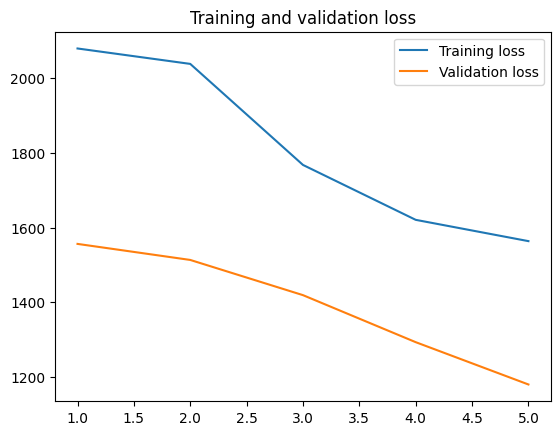

In [107]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

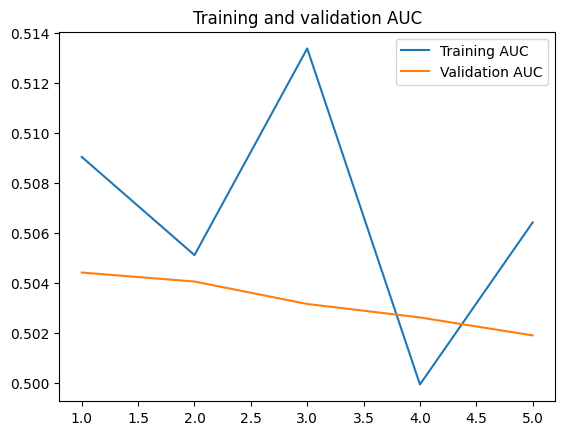

In [108]:
auc = history.history['auc']
val_auc = history.history['val_auc']
epochs = range(1, len(auc) + 1)
plt.figure()
plt.plot(epochs, auc, label='Training AUC')
plt.plot(epochs, val_auc, label='Validation AUC')
plt.title('Training and validation AUC')
plt.legend()
plt.show()

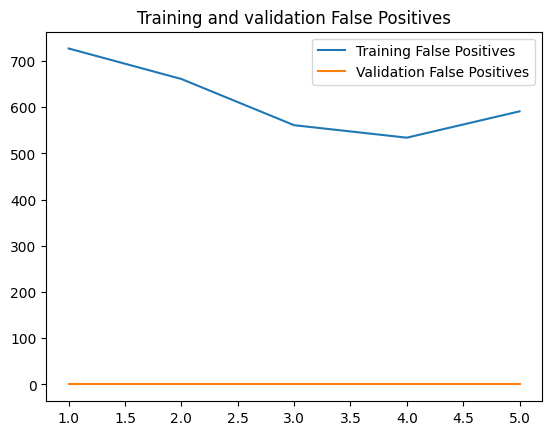

In [109]:
fp = history.history['fp']
val_fp = history.history['val_fp']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, fp, label='Training False Positives')
plt.plot(epochs, val_fp, label='Validation False Positives')
plt.title('Training and validation False Positives')
plt.legend()
plt.show()

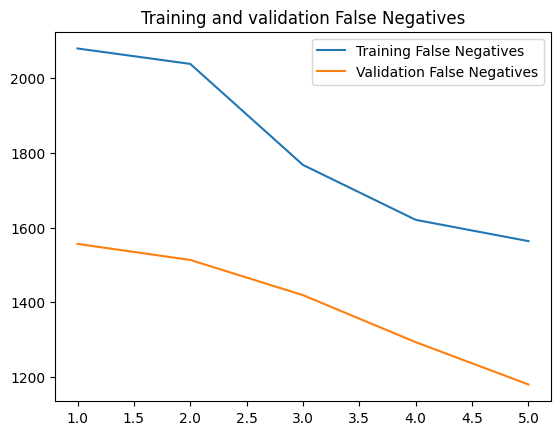

In [110]:
fn = history.history['fn']
val_fn = history.history['val_fn']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, label='Training False Negatives')
plt.plot(epochs, val_loss, label='Validation False Negatives')
plt.title('Training and validation False Negatives')
plt.legend()
plt.show()

In [113]:
model_rnn.save('best_model.keras')  # This saves it in the new format
